In [118]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm

import math

# Binomial Distribution

In [64]:
# Think of n=5 as:

#     "I’m flipping 5 coins at once"
#     — OR —
#     "I’m flipping 1 coin 5 times"
#  n = number of trials per experiment
# size = number of experiments you're running


In [65]:
binomial_variable = st.binom.rvs(n=5, p=0.5, size=100)
binomial_variable

array([2, 4, 3, 1, 3, 3, 3, 3, 1, 2, 1, 5, 3, 5, 5, 2, 4, 2, 4, 2, 3, 2,
       3, 1, 1, 3, 3, 3, 4, 3, 4, 1, 3, 2, 2, 5, 3, 3, 2, 1, 2, 0, 2, 1,
       4, 4, 5, 1, 4, 4, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 1, 3, 2, 4, 3, 1,
       2, 2, 1, 2, 4, 3, 3, 3, 3, 1, 4, 3, 4, 4, 3, 2, 4, 3, 1, 3, 2, 2,
       5, 4, 5, 3, 2, 1, 5, 1, 1, 3, 1, 2], dtype=int64)

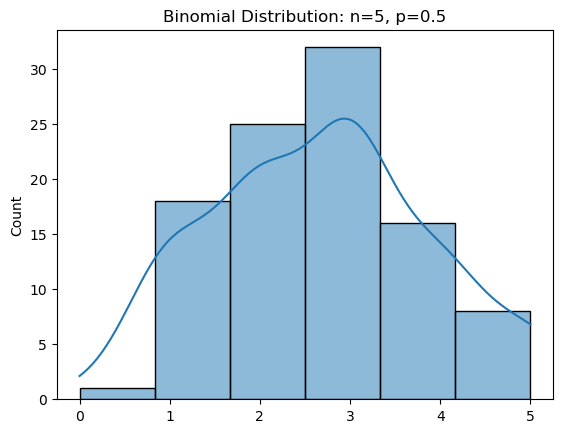

In [66]:
sns.histplot(binomial_variable, bins=6, kde=True)
plt.title('Binomial Distribution: n=5, p=0.5')
plt.show()

 CDF – Cumulative Distribution Function

    Gives the cumulative probability up to a value:
    F(x)=P(X≤x)

In [67]:
# You're flipping a coin 5 times → n = 5

# Each flip has a 50% chance of heads → p = 0.5

# You're asking:
# 👉 “What’s the probability of getting at most 3 heads?”
#(i.e., 0, 1, 2, or 3 heads)

st.binom.cdf(k=5, p=0.5, n=10)

0.623046875

PMF – Probability Mass Function

    Gives the probability of exact values.

    Notation:
    P(X=x)

In [68]:
# you're flipping a coin 5 times → n = 5
# Each flip has a 50% chance of heads → p = 0.5
# You're asking:
# 👉 “What’s the probability of getting exactly 3 heads?”

st.binom.pmf(k=3, p=0.5, n=10)

0.1171875

SF – Survival Function (a.k.a 1 - CDF)

In [69]:
# Interpretation:

#     You're flipping a coin 5 times → n = 5

#     Each flip has a 50% chance of heads → p = 0.5

#     You're asking:
#     👉 “What’s the probability of getting more than 3 heads?”

st.binom.sf(k=3, p=0.5, n=5)

0.1875

In [70]:
1 - st.binom.cdf(k=3, p=0.5, n=5)

0.1875

ppf (Percent Point Function) = Inverse of cdf

    Answers: "What is the smallest number of successes (k) such that P(X ≤ k) ≥ q?"
    In simpler words: What’s the smallest k where the cumulative probability reaches at least q?
    Example:
    👉 "If I flip a coin 10 times, what is the smallest number of heads that covers 95% of the cases?"

In [71]:
st.binom.ppf(0.95, p=0.5, n=10)

8.0

isf (Inverse Survival Function) = Inverse of sf

    Answers: "What is the smallest number of successes (k) such that P(X > k) ≤ q?"
    In simpler words: What’s the smallest k where the probability of getting more than that is at most q?
    Example:
    👉 "If I flip a coin 10 times, what is the smallest number of heads where the probability of getting more than that is at most 5%?"

In [72]:
st.binom.isf(0.5, p=0.5, n=10)

5.0

# Normal Distribution

In [73]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Significance Level (α)

    This is the probability of making a Type I error (rejecting a true null hypothesis).

    It represents the area in the rejection region (tails) of the distribution.

    Common values: α=0.05, α=0.01, α=0.10

Confidence Level (1−α)

    This is the probability of NOT making a Type I error (correctly failing to reject H0​).

    It represents the area in the middle of the distribution (acceptance region).

    If α=0.05, then confidence level is 1−0.05=95%

Critical Value

    This is the Z-score or T-score that corresponds to a given αα.

    It determines the cut-off point for rejecting H0​.

    If a test statistic falls beyond this value, we reject the null hypothesis.

In [74]:
df.describe(include='number')

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [75]:
# Find Confidence Interval for the mean of total bill
# 95% confidence interval for the mean of total bill

In [76]:
n = df.total_bill.count()
total_bill_mean = df.total_bill.mean()
total_bill_std = df.total_bill.std()
alpha = 0.05
se = total_bill_std /math.sqrt(n)
zalphaby2 = st.t.isf(alpha/2, n-1)

lcl = total_bill_mean - zalphaby2*se
ucl = total_bill_mean + zalphaby2*se
(lcl, ucl)

(18.663331704358473, 20.908553541543167)

In [77]:
st.norm.interval(confidence=1-alpha, loc=total_bill_mean, scale=total_bill_std/math.sqrt(n))

(18.668922839262997, 20.902962406638643)

In [78]:
st.norm.interval(confidence=1-alpha)

(-1.959963984540054, 1.959963984540054)

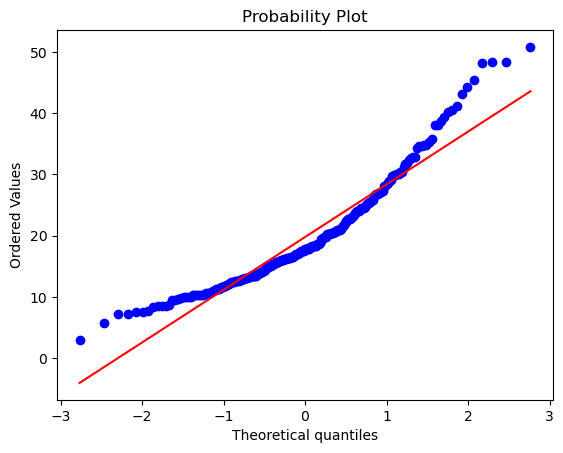

In [79]:
st.probplot(df.total_bill, plot=plt)
plt.show()

A financial firm has created 50 portfolios. From them a sample of 13 portfolios was
selected, out of which 8 were found to be underperforming. Construct a 99% confidence
interval to estimate the population proportion.

In [80]:
# proportion
n = 13
x = 8
p = x/n
q = 1-p
alpha = 0.01
se = math.sqrt((p*q)/n)
zalphaby2 = st.norm.isf(alpha/2)
lcl = p - zalphaby2*se
ucl = p + zalphaby2*se
(lcl, ucl)

(0.26782280814713794, 0.962946422622093)

In [81]:
import statsmodels.api as sm

In [82]:
sm.stats.proportion_confint(x, n, alpha=alpha)

(0.26782280814713794, 0.962946422622093)

1. Is the average total bill $20? verify @ 5% level of significance?

Ho: mutb = 20

Ha: mutb != 20

In [83]:
mutb = 20
alpha = 0.05
x_bar = df.total_bill.mean()
s = df.total_bill.std()
n = df.total_bill.count()
zalphaby2 = (x_bar - mutb) / (s / math.sqrt(n))
zalphaby2

-0.37559294451919506

In [84]:
st.ttest_1samp(df.total_bill, mutb)

TtestResult(statistic=-0.37559294451919506, pvalue=0.7075471935626723, df=243)

In [85]:
zcrit = st.t.ppf(alpha/2, n-1)
zcrit

-1.9697743954258797

In [86]:
zcrit = st.t.isf(alpha/2, n-1)
zcrit

1.9697743954258797

In [87]:
st.t.cdf(1.96, n-1)

0.9744306658613249

Is the total bill same for lunch and dinner? verify @ 5% level of significance.

In [88]:
df.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [89]:
df.groupby('time')['total_bill'].agg(['mean', 'std'])

C:\Users\kumars\AppData\Local\Temp\ipykernel_17480\1440277355.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].agg(['mean', 'std'])


,mean,std
time,,
Lunch,17.168676,7.713882
Dinner,20.797159,9.142029


In [90]:
df_l = df[df['time'] == "Lunch"]
df_d = df[df['time'] == "Dinner"]

In [91]:
alpha = 0.05

In [92]:
#variance test
st.levene(df_l.total_bill, df_d.total_bill)

LeveneResult(statistic=2.6906995489829337, pvalue=0.1022346107726258)

H0: mu_tb_l = mu_tb_d

H1: mu_tb_l != mu_tb_d

Two tailed Test

In [93]:
st.ttest_ind(df_l.total_bill, df_d.total_bill, alternative="two-sided", equal_var=True, random_state=29)

TtestResult(statistic=-2.8976375218366424, pvalue=0.004104621407595674, df=242.0)

In [94]:
#  correlation coefficient test
st.pearsonr(df.total_bill, df.tip)

PearsonRResult(statistic=0.6757341092113645, pvalue=6.692470646863819e-34)

# ANOVA

In [95]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

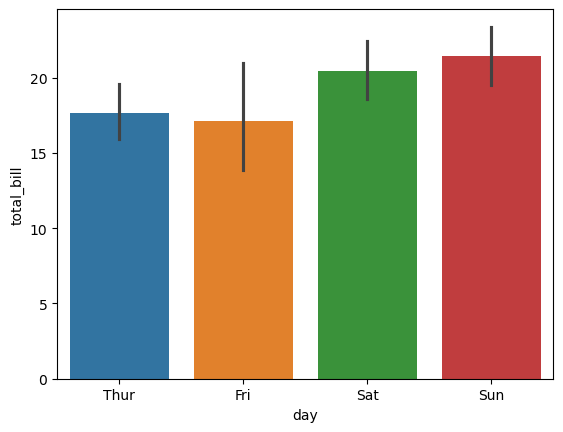

In [97]:
sns.barplot(df, x='day', y='total_bill', hue='day')
plt.show()

In [98]:
g1 = df[df['day']=='Fri']['total_bill']
g2 = df[df['day']=='Sat']['total_bill']
g3 = df[df['day']=='Sun']['total_bill']
g4 = df[df['day']=='Thur']['total_bill']

In [99]:
st.levene(g1,g2,g3)

LeveneResult(statistic=0.21265969671748575, pvalue=0.8086351541828094)

In [100]:
g_day = df.groupby(by='day', observed=True)

In [101]:
g_day.groups.keys()

dict_keys(['Thur', 'Fri', 'Sat', 'Sun'])

In [102]:
g_day.get_group('Thur')

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
205,16.47,3.23,Female,Yes,Thur,Lunch,3


In [103]:
st.levene(*(g_day.get_group(g)['total_bill'] for g in g_day.groups.keys()))

LeveneResult(statistic=0.6653578279881612, pvalue=0.5740792267812198)

In [104]:
st.levene(g1,g2,g3,g4)

LeveneResult(statistic=0.6653578279881612, pvalue=0.5740792267812198)

In [105]:
st.f_oneway(g1, g2, g3, g4)

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

Levene’s, Fligner-Killeen, and Bartlett’s tests are all used to test homogeneity of variances, i.e., whether two or more groups have equal variances.

In [106]:
st.levene(*(g_day.get_group(g)['total_bill'] for g in g_day.groups.keys()))

LeveneResult(statistic=0.6653578279881612, pvalue=0.5740792267812198)

In [107]:
st.bartlett(*(g_day.get_group(g)['total_bill'] for g in g_day.groups.keys()))

BartlettResult(statistic=2.4618321570560986, pvalue=0.4822283732576076)

In [108]:
st.fligner(*(g_day.get_group(g)['total_bill'] for g in g_day.groups.keys()))

FlignerResult(statistic=2.6635079307710305, pvalue=0.44646440202553384)

In [109]:
st.f_oneway(*(g_day.get_group(g)['total_bill'] for g in g_day.groups.keys()))

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

F-statistic = 2.767, p-value = 0.042

Since p-value < 0.05 → we reject the null hypothesis

This means: At least two group means are significantly different

In [110]:
sm.stats.anova_oneway((g_day.get_group(g)['total_bill'] for g in g_day.groups.keys()), use_var="equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 2.7674794432863385
pvalue = 0.04245383328952047
df = (3.0, 240.0)
df_num = 3.0
df_denom = 240.0
nobs_t = 244.0
n_groups = 4
means = array([17.68274194, 17.15157895, 20.44137931, 21.41      ])
nobs = array([62., 19., 87., 76.])
vars_ = array([62.19168252, 68.93415848, 89.87833761, 78.006376  ])
use_var = 'equal'
welch_correction = True
tuple = (2.7674794432863385, 0.04245383328952047)

In [111]:
#Manual Calulation

In [112]:
overlall_mean = df.total_bill.mean()
sst = sum([len(g_day.groups.get(g))*((g_day.get_group(g)['total_bill'].mean() - overlall_mean)**2) for g in g_day.groups.keys()])
sse = sum([(len(g_day.groups.get(g)) - 1)*(g_day.get_group(g)['total_bill'].var()) for g in g_day.groups.keys()])
mst = sst/(len(g_day.groups.keys()) - 1)
mse = sse/(df.total_bill.count() - len(df.day.unique()))
f = mst/mse
print("SST:", sst)
print("MST:", mst)
print("SSE:", sse)
print("MSE:", mse)
print("F-statistic:", f)

SST: 643.9413622114165
MST: 214.64712073713883
SSE: 18614.522720985304
MSE: 77.56051133743877
F-statistic: 2.767479443286339


\+ → Additive effects (main effects)

    Includes variables individually, no interaction.<br>
    'Y ~ A + B'<br>
     Y = β0 + β1*A + β2*B + ε

: → Interaction only

    Includes the interaction term between A and B, but not the individual (main) effects.<br>
    'Y ~ A:B'<br>
    Y = β0 + β1*(A × B) + ε

\* → Main effects + Interaction

    Shortcut that includes both A, B, and their interaction (same as A + B + A:B).<br>
    'Y ~ A * B'<br>
    Y = β0 + β1*A + β2*B + β3*(A × B) + ε

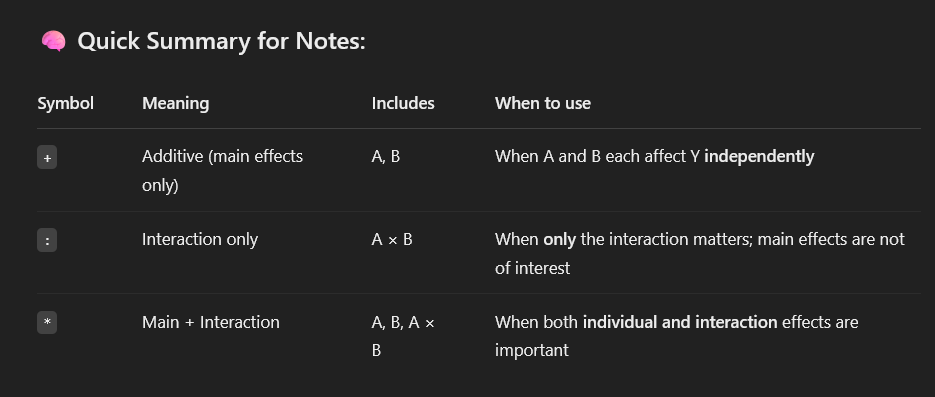


In [113]:
# Main Effect Only
model = sm.formula.ols("total_bill ~ C(day) + C(sex)", data=df).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,643.941362,214.647121,2.788340,0.041321
C(sex),1.0,216.241255,216.241255,2.809048,0.095042
Residual,239.0,18398.281466,76.980257,NaN,NaN


🧠 Hypotheses:

    H₀ (Null Hypothesis):
    day has no effect on total_bill (group means are equal)

    H₁ (Alternative Hypothesis):
    At least one day has a different mean total_bill → day has an effect

📊 Result for C(day):

    F-statistic = 2.79

    p-value = 0.041

✅ Interpretation:

    Since p < 0.05, we reject the null hypothesis (H₀).

    ✅ Conclusion:
    day does have a statistically significant effect on total_bill.

In [114]:
# Interaction Only

model = sm.formula.ols("total_bill ~ C(day):C(sex)", data=df).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day):C(sex),7.0,940.043423,134.291918,1.730111,0.102735
Residual,236.0,18318.420661,77.620427,NaN,NaN


Hypotheses for C(day):C(sex):

    H₀ (Null Hypothesis):
    There is no interaction effect between day and sex on total_bill.
    That is, the effect of sex is the same across all days and vice versa.

    H₁ (Alternative Hypothesis):
    There is an interaction effect — the effect of one variable depends on the level of the other.

✅ Interpretation:

    F-statistic = 1.73: There is some variance explained by the interaction, but...

    p-value = 0.103 > 0.05 → So we fail to reject H₀.

🧾 Conclusion:

    ❌ No statistically significant interaction between day and sex.

    That means: the pattern of total_bill across days doesn't differ meaningfully between males and females.

In [115]:
# Main effects + Interaction
model = sm.formula.ols("total_bill ~ C(day)*C(sex)", data=df).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,643.941362,214.647121,2.765343,0.042612
C(sex),1.0,216.241255,216.241255,2.785881,0.096424
C(day):C(sex),3.0,79.860806,26.620269,0.342954,0.794284
Residual,236.0,18318.420661,77.620427,NaN,NaN


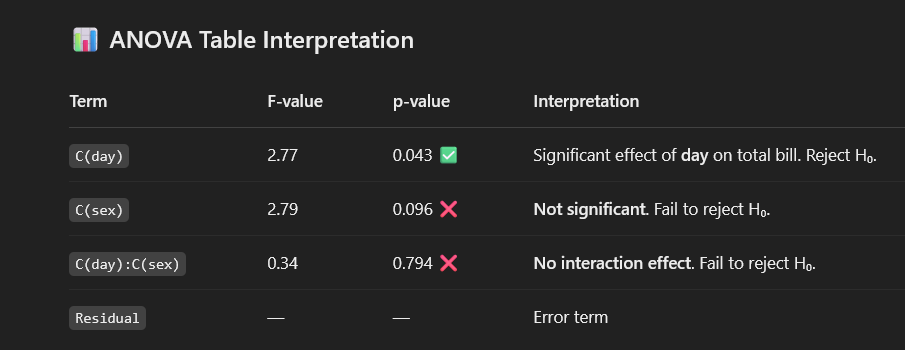

But which groups differ?

That’s where Tukey’s HSD comes in.

In [116]:
print(sm.stats.multicomp.MultiComparison(df.total_bill, df.day).tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------


The reject column tells you whether the pair has a significant difference.

ANOVA tells you “some difference exists”, but Tukey HSD shows that individual differences aren't strong enough (after adjusting for multiple comparisons). This can happen when:

    Group means are close, and

    ANOVA barely passes the significance threshold (like p = 0.042)

In [128]:
# crosstab and pivot brushup
pd.crosstab(index=df.day, columns=df.sex, values=df.total_bill,  aggfunc=["mean", "std"])

mean                   std          
sex        Male     Female       Male    Female
day                                            
Thur  18.714667  16.715312   8.019728  7.759764
Fri   19.857000  14.145556  10.015847  4.788547
Sat   20.802542  19.680357   9.836306  8.806470
Sun   21.887241  19.872222   9.129142  7.837513

In [125]:
pd.pivot_table(df, index="day", columns="sex",  values="total_bill", aggfunc=["mean"])

C:\Users\kumars\AppData\Local\Temp\ipykernel_17480\1283305923.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, index="day", columns="sex",  values="total_bill", aggfunc=["mean"])


mean           
sex        Male     Female
day                       
Thur  18.714667  16.715312
Fri   19.857000  14.145556
Sat   20.802542  19.680357
Sun   21.887241  19.872222

In [129]:
# crosstab default behaviour is count frequency
pd.crosstab(df.day, df.sex)

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18
